# $\zeta$-Space of colored noises

--------------------------------

This notebook is an example of the $\zeta$-space application over colored noise signals. The implementation is presented [here](https://github.com/rsautter/Zeta-Space). 

In [1]:
!pip install MFDFA==0.4.1
!pip install git+https://github.com/rsautter/Zeta-Space/

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/rsautter/Zeta-Space/ to /tmp/pip-req-build-ek1j4cwx
  Running command git clone -q https://github.com/rsautter/Zeta-Space/ /tmp/pip-req-build-ek1j4cwx
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for zetaSpace: filename=zetaSpace-0.1-py3-none-any.whl size=5915 sha256=6782f16cf3bf250550beb13ff4c2cee33434b54fbc45bca37792eedbe4d5e0e6
  Stored in directory: /tmp/pip-ephem-wheel-cache-i8i56a8n/wheels/db/bc/42/483e13446677140b7bb424768a5a65bef571a830bc8bc11145
Successfully built zetaSpace


In [2]:
import zeta
import matplotlib.pyplot as plt
import numpy as np

# 1. Synthetic Colored Noise

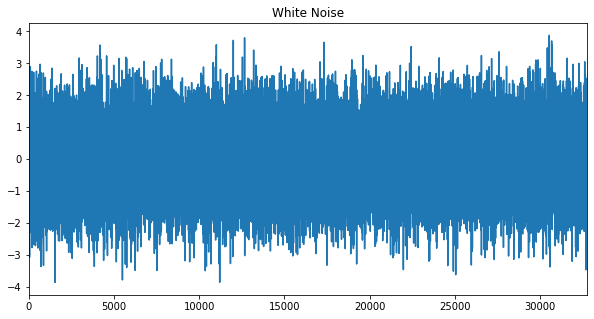

In [42]:
wn = zeta.cNoise(0,[2**15])
wn = wn/np.std(wn)
plt.figure(figsize=(10,5))
plt.plot(wn)
plt.xlim(0,len(wn))
plt.title(r"White Noise")
plt.show()

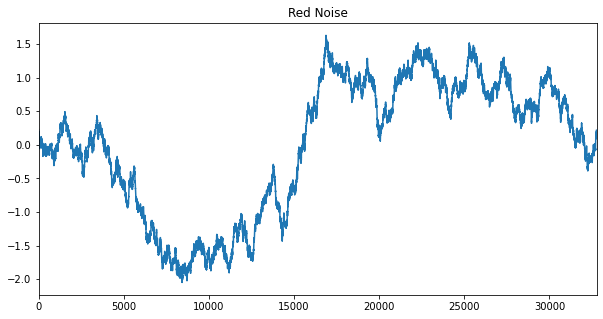

In [43]:
rn = zeta.cNoise(2,[2**15])
rn = rn/np.std(rn)
plt.figure(figsize=(10,5))
plt.plot(rn)
plt.xlim(0,len(rn))
plt.title(r"Red Noise")
plt.show()

# 2. Visualizing Set of Singularity Spectrum

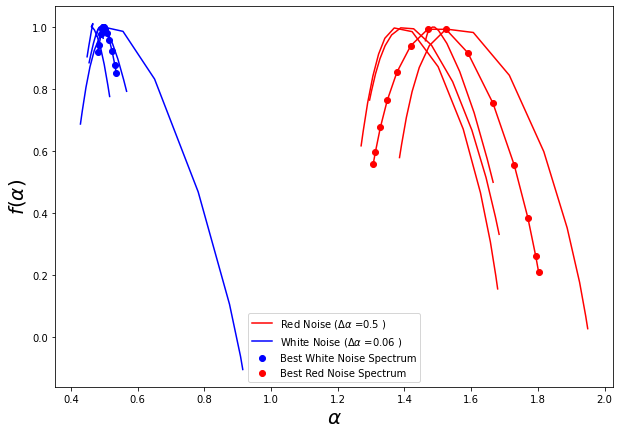

In [30]:
baws, bfaws, aws, faws, _  = zeta.autoMDFDA(wn)
bars, bfars, ars, fars, _  = zeta.autoMDFDA(rn)
daw = np.round(zeta.singularitySpectrumMetrics(baws,bfaws)["delta_alpha"],2)
dar = np.round(zeta.singularitySpectrumMetrics(bars,bfars)["delta_alpha"],2)

plt.figure(figsize=(10,7))
for i in range(len(ars)):
  if i==0:
    plt.plot(ars[i],fars[i],color='r',label=r"Red Noise ($\Delta \alpha$ ="+str(dar)+" )")
  else:
    plt.plot(ars[i],fars[i],color='r')
for i in range(len(aws)):
  if i==0:
    plt.plot(aws[i],faws[i],color='b',label=r"White Noise ($\Delta \alpha$ ="+str(daw)+" )")
  else:
    plt.plot(aws[i],faws[i],color='b')

plt.scatter(baws,bfaws,color='b',label="Best White Noise Spectrum")
plt.scatter(bars,bfars,color='r',label="Best Red Noise Spectrum")
plt.xlabel(r"$\alpha$",fontsize=20)
plt.ylabel(r"$f(\alpha)$",fontsize=20)

plt.legend()
plt.show()

# 3. Visualizing Power Spectrum Density

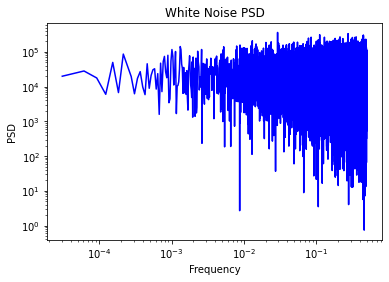

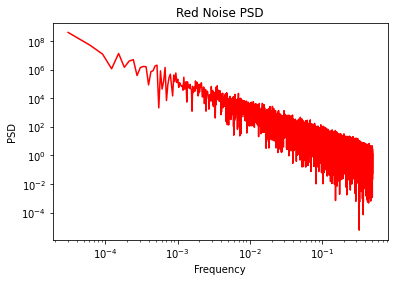

In [47]:
import numpy as np

psdw = np.fft.fft(wn)
psdw = np.real(psdw*np.conj(psdw))
psdr = np.fft.fft(rn)
psdr = np.real(psdr*np.conj(psdr))

freq = np.fft.fftfreq(len(wn))
seq = np.argsort(freq)


psdw = psdw[seq]
psdr = psdr[seq]
freq = freq[seq]
psdw = psdw[freq>0]
psdr = psdr[freq>0]
freq = freq[freq>0]

plt.figure()
plt.title("White Noise PSD")
plt.loglog(freq,psdw,color="b")
plt.xlabel("Frequency")
plt.ylabel("PSD")

plt.figure()
plt.loglog(freq,psdr,color="r")
plt.title("Red Noise PSD")
plt.xlabel("Frequency")
plt.ylabel("PSD")
plt.show()

# 4. $\zeta$ - Space

In [48]:
print("White Noise zeta values:")
print(zeta.zetaSpace(wn))

White Noise zeta values:
{'spectral_entropy': 0.9592005020331229, 'delta_alpha': 0.09604168137971103}


In [49]:
print("Red Noise zeta values:")
print(zeta.zetaSpace(rn))

Red Noise zeta values:
{'spectral_entropy': 0.1631020433883106, 'delta_alpha': 0.25644919177718717}


## 4.1. Multiple samples of colored noise

100%|██████████| 20/20 [01:00<00:00,  3.02s/it]


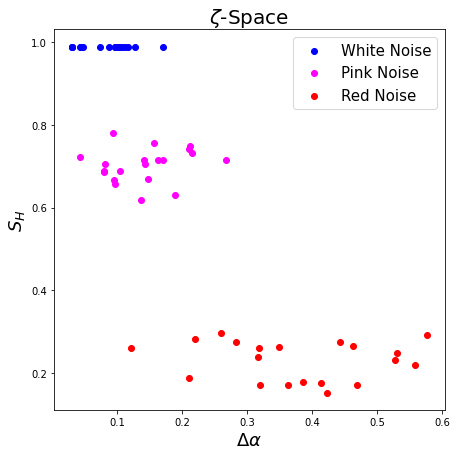

In [36]:
import pandas as pd
import tqdm

sampleSize = 2**15
nsamples = 20
wn,pn,rn = [],[],[]

for i in tqdm.tqdm(range(nsamples)):
  wn.append(zeta.zetaSpace(zeta.cNoise(0,[sampleSize]) ) )
  pn.append(zeta.zetaSpace(zeta.cNoise(1,[sampleSize]) ) )
  rn.append(zeta.zetaSpace(zeta.cNoise(2,[sampleSize]) ) )

wn = pd.DataFrame(wn)
pn = pd.DataFrame(pn)
rn = pd.DataFrame(rn)

plt.figure(figsize=(7,7))
plt.scatter(wn["delta_alpha"],wn["spectral_entropy"],color='b',label="White Noise")
plt.scatter(pn["delta_alpha"],pn["spectral_entropy"],color='magenta',label="Pink Noise")
plt.scatter(rn["delta_alpha"],rn["spectral_entropy"],color='r',label="Red Noise")
plt.xlabel(r"$\Delta \alpha$",fontsize=18)
plt.ylabel(r"$S_H$",fontsize=18)
plt.title(r"$\zeta$-Space",fontsize=20)
plt.legend(fontsize=15)
plt.show()